# Projet: Analyse et Prédiction de Consommation de Carburant des Véhicules

#### Auteur : Fidèle Ledoux

### Résumé du Projet
Ce projet vise à analyser et prédire la consommation de carburant (mpg - miles per gallon) des véhicules à partir du jeu de données "mtcars". L'objectif principal est d'explorer les relations entre différentes caractéristiques des véhicules (puissance, poids, cylindres, etc.) et leur consommation, puis de construire un modèle de régression pour minimiser l'erreur quadratique moyenne (MSE). Le projet inclut également la mise en œuvre d'un réseau de neurones pour améliorer les prédictions.

##### Points Clés
Exploration des données : Visualisation des relations entre variables.

Prétraitement : Nettoyage et préparation des données pour la modélisation.

Modélisation :

Régression linéaire pour prédire la consommation.

Réseau de neurones pour capturer des relations non linéaires.

Visualisation : Graphiques attractifs pour illustrer les résultats.

### 1. Importation et Configuration des Librairies

In [1]:
# Librairies pour la manipulation des données 
import numpy as np
import pandas as pd

# Librairies pour la visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Librairies pour le machine learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Autres utilitaires 
import scipy
import warnings
warnings.filterwarnings('ignore')

### 2. Chargement et Exploration des Données

#### 2.1. Chargement du jeu de données

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
data.rename(columns={'Unnamed: 0': 'brand'}, inplace=True)

#### 2.2. Aperçu des données

In [3]:
print(data.head())
print("\nDimensions du dataset :", data.shape)
print("\nValeurs manquantes :\n", data.isna().sum())

               brand   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  

Dimensions du dataset : (32, 12)

Valeurs manquantes :
 brand    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64


#### 2.3. Visualisations Exploratoires

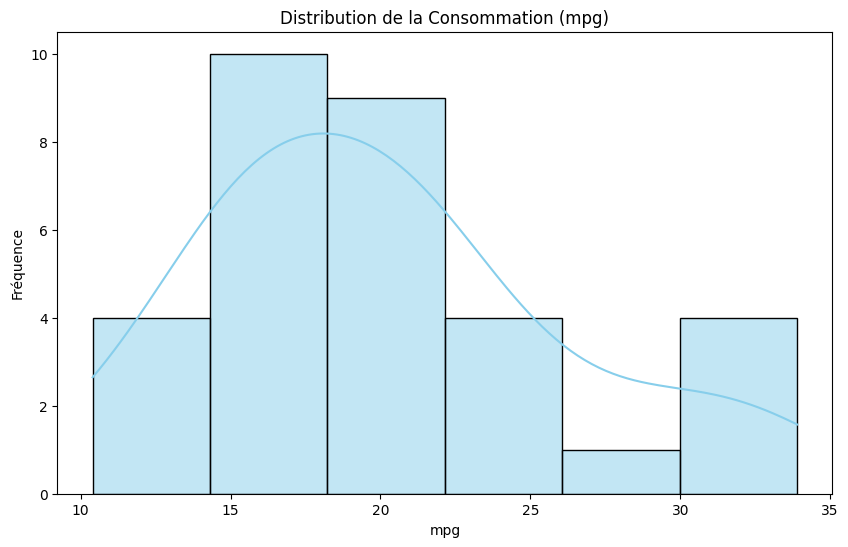

In [10]:
# Distribution de la consommation (mpg)
plt.figure(figsize=(10, 6))
sns.histplot(data['mpg'], kde=True, color='skyblue')
plt.title('Distribution de la Consommation (mpg)')
plt.xlabel('mpg')
plt.ylabel('Fréquence')
plt.show()

Ce graphique (histogramme avec courbe de densité) montre la répartition des valeurs de consommation de carburant (mpg) dans le jeu de données. Il permet d’identifier la tendance centrale, la dispersion et la présence éventuelle de valeurs extrêmes.On peut ainsi voir si la consommation est plutôt concentrée autour d’une valeur ou si elle est très variable selon les véhicules. 


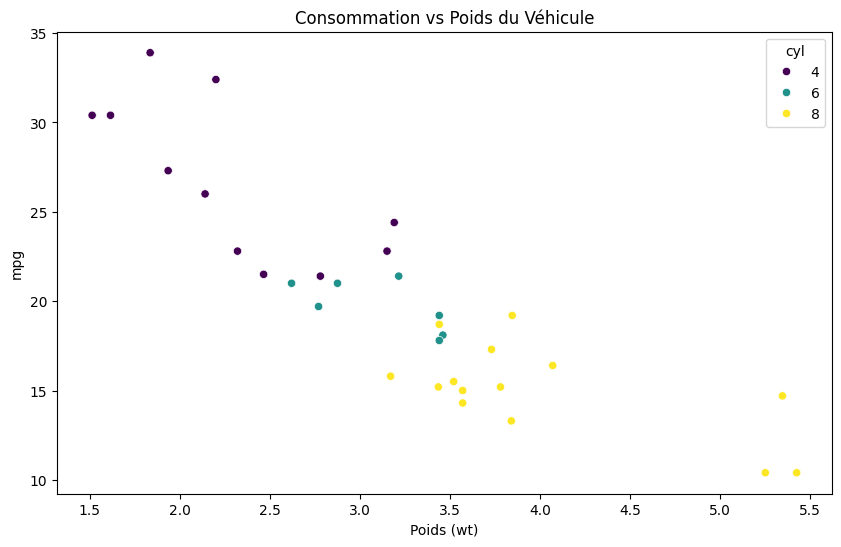

In [11]:
# Relation entre poids (wt) et consommation (mpg) 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wt', y='mpg', data=data, hue='cyl', palette='viridis')
plt.title('Consommation vs Poids du Véhicule')
plt.xlabel('Poids (wt)')
plt.ylabel('mpg')
plt.show()

Le nuage de points (scatterplot) illustre la relation entre le poids du véhicule (wt) et sa consommation (mpg). Chaque point représente un véhicule, la couleur indiquant le nombre de cylindres (cyl). Ce graphique permet de visualiser la corrélation négative attendue : en général, plus un véhicule est lourd, plus sa consommation augmente (mpg diminue). La coloration par cylindres aide à voir si ce facteur influence aussi la relation.

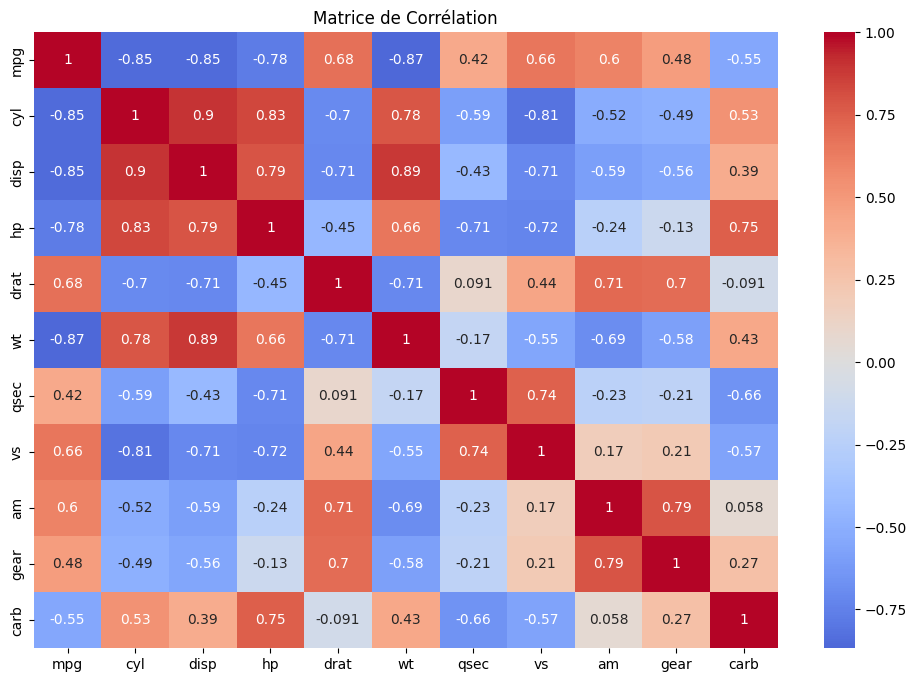

In [12]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop('brand', axis=1).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

La heatmap affiche les coefficients de corrélation entre toutes les variables numériques du jeu de données. Elle permet d’identifier rapidement les relations linéaires fortes (positives ou négatives) entre les variables, ce qui est utile pour la sélection des variables explicatives et la compréhension des dépendances dans les données

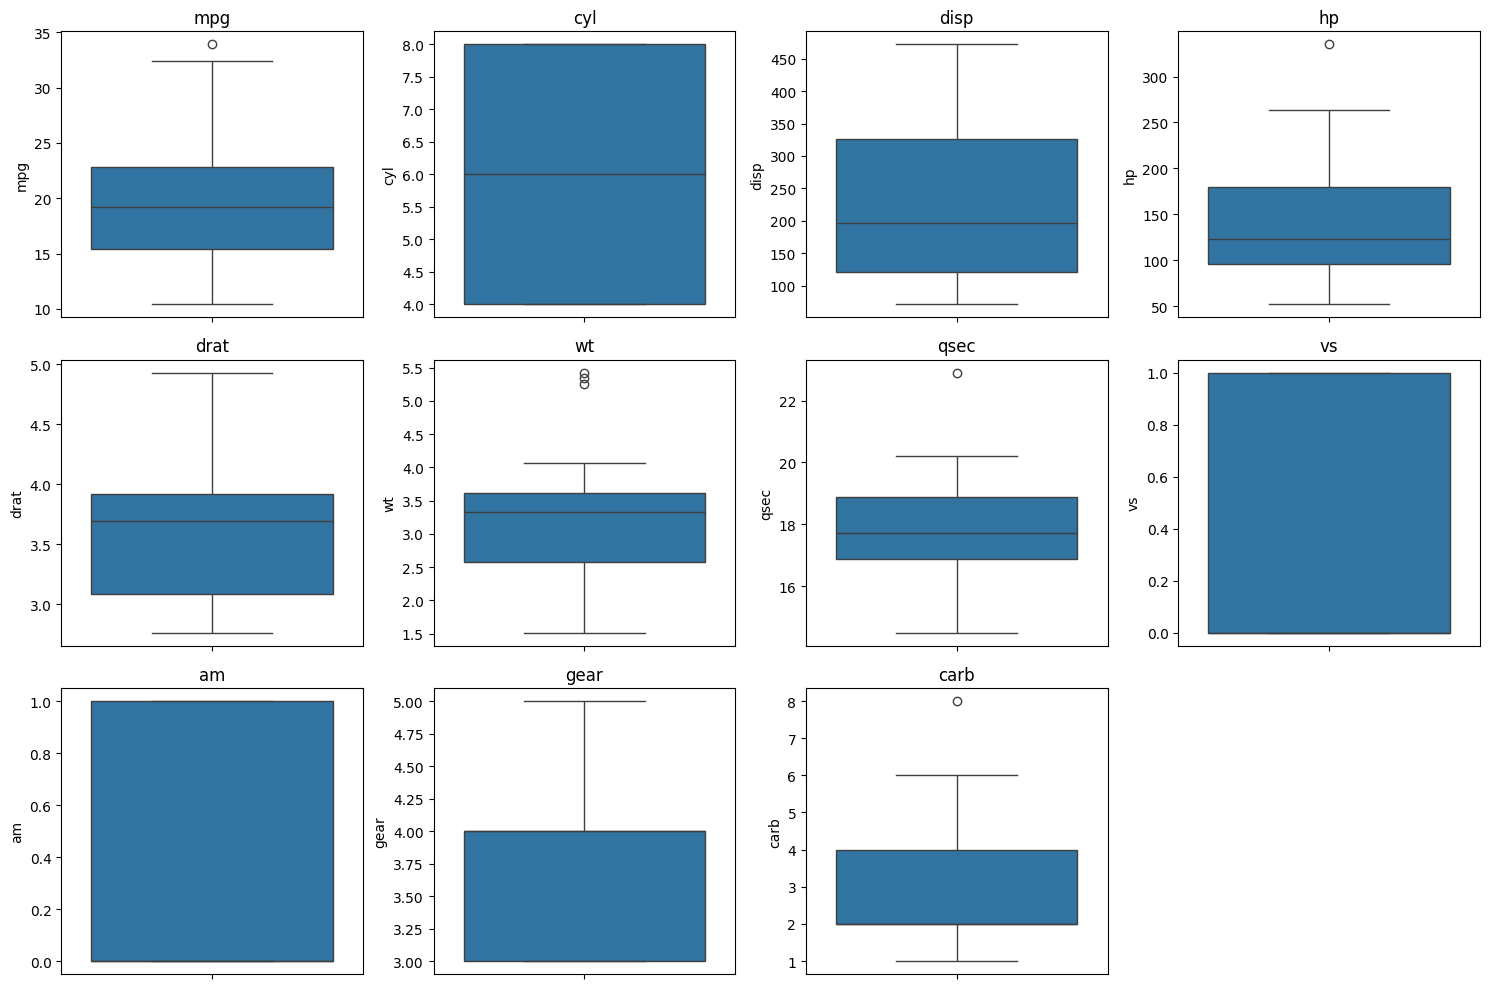

In [16]:
# Sélectionner les colonnes numériques sauf 'brand'
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Créer des sous-plots pour chaque colonne numérique
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Les boxplots montrent la distribution de chaque variable numérique et mettent en évidence la présence d’outliers. Ici, on remarque que la plupart des variables n’ont pas d’extrêmes marqués, ce qui indique une bonne qualité des données pour la modélisation.
Il n'y a pas beaucoup d'outliers, il n'est donc pas nécessaire de les enlever

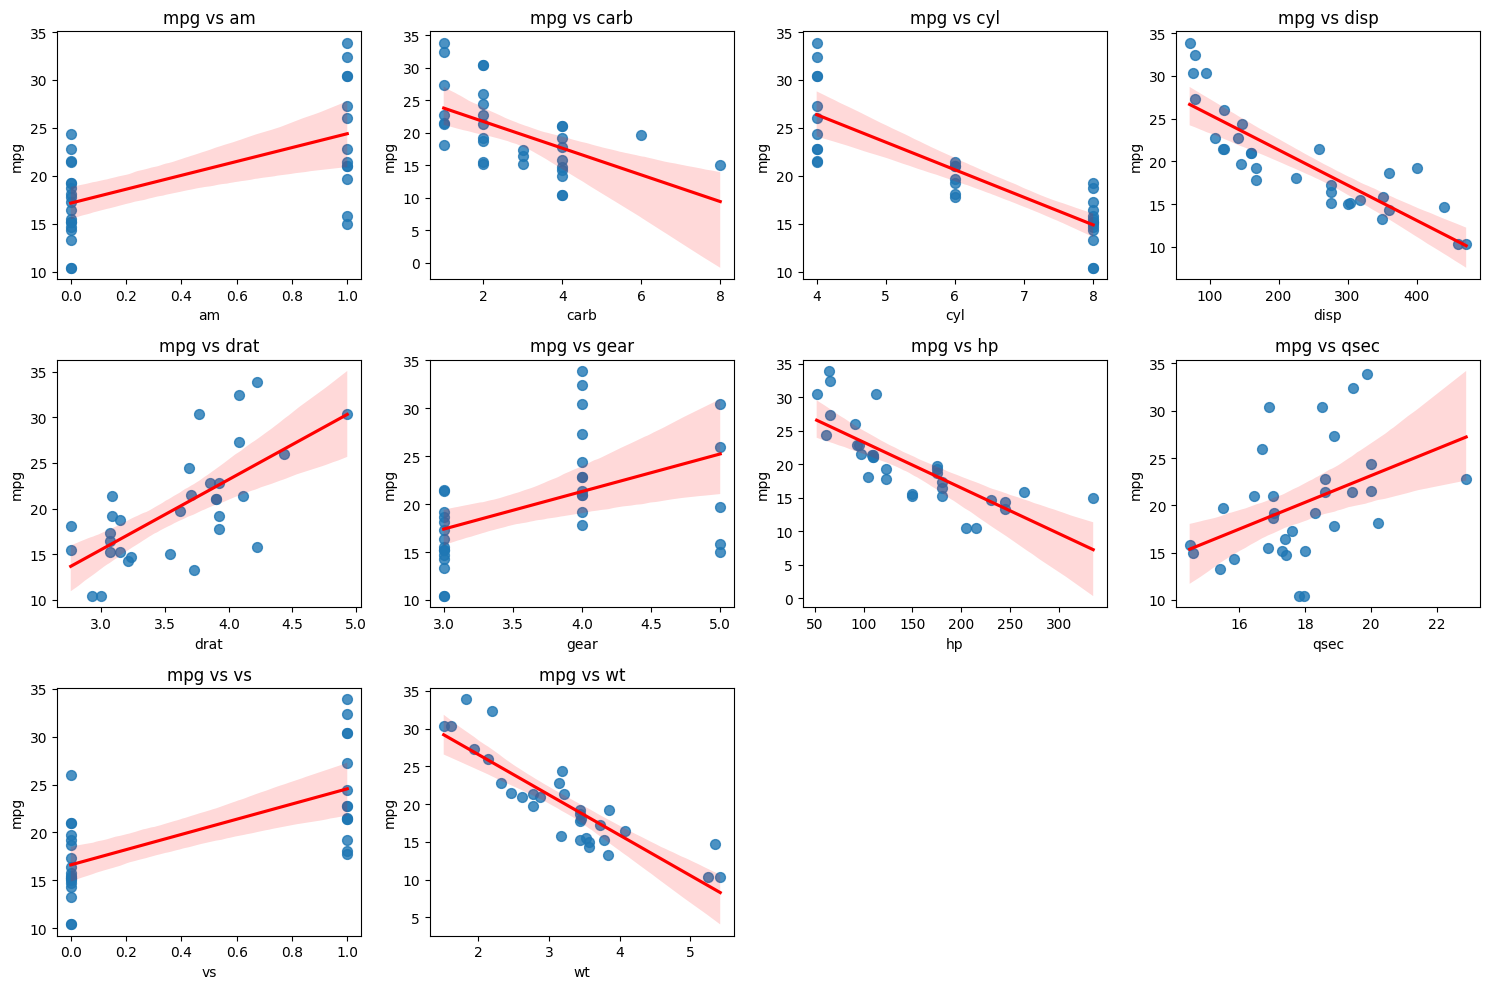

In [17]:
columns_to_include = data.columns.difference(['brand', 'mpg'])

# Créer des sous-plots pour chaque colonne par rapport à mpg
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_include, 1):
    plt.subplot(3, 4, i)
    sns.regplot(x=data[column], y=data['mpg'], scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'mpg vs {column}')

plt.tight_layout()
plt.show()

Chaque sous-graphique montre la relation entre la consommation (mpg) et une autre variable du jeu de données, avec une droite de régression. Cela permet de visualiser l’influence individuelle de chaque variable sur la consommation et d’identifier les relations linéaires ou non.

### 3. Préparation des Données pour la Modélisation

In [6]:
# Sélection des caractéristiques et de la cible
X = data.drop(['mpg', 'brand'], axis=1)
y = data['mpg']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 4. Modélisation

#### 4.1. Régression Linéaire

In [7]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"MSE (Régression Linéaire) : {mse_lr:.2f}")

MSE (Régression Linéaire) : 10.13


#### 4.2. Réseau de Neurones

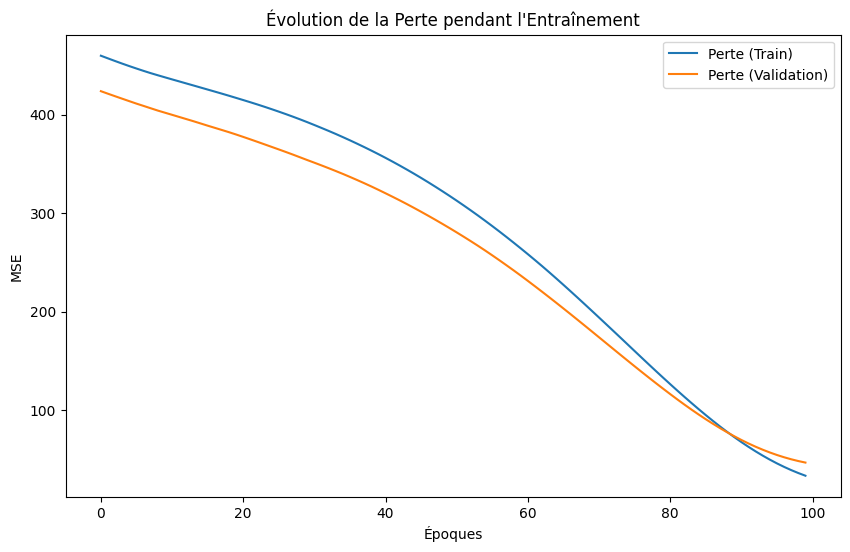

1/1 [==============================] - 0s 93ms/step
MSE (Réseau de Neurones) : 57.63


In [8]:
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model_nn.compile(optimizer='adam', loss='mse')
history = model_nn.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Visualisation de la perte pendant l'entraînement
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perte (Train)')
plt.plot(history.history['val_loss'], label='Perte (Validation)')
plt.title('Évolution de la Perte pendant l\'Entraînement')
plt.xlabel('Époques')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Évaluation
y_pred_nn = model_nn.predict(X_test).flatten()
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"MSE (Réseau de Neurones) : {mse_nn:.2f}")

#### Évolution de la Perte pendant l’Entraînement (Réseau de Neurones)
Ce graphique montre l’évolution de la perte (MSE) sur l’ensemble d’entraînement et de validation au fil des époques lors de l’entraînement du réseau de neurones. Il permet de vérifier la convergence du modèle, de détecter un éventuel surapprentissage (overfitting) si la courbe de validation diverge de celle de l’entraînement, et d’ajuster les paramètres si besoin.

### 5. Comparaison des Modèles et Visualisation

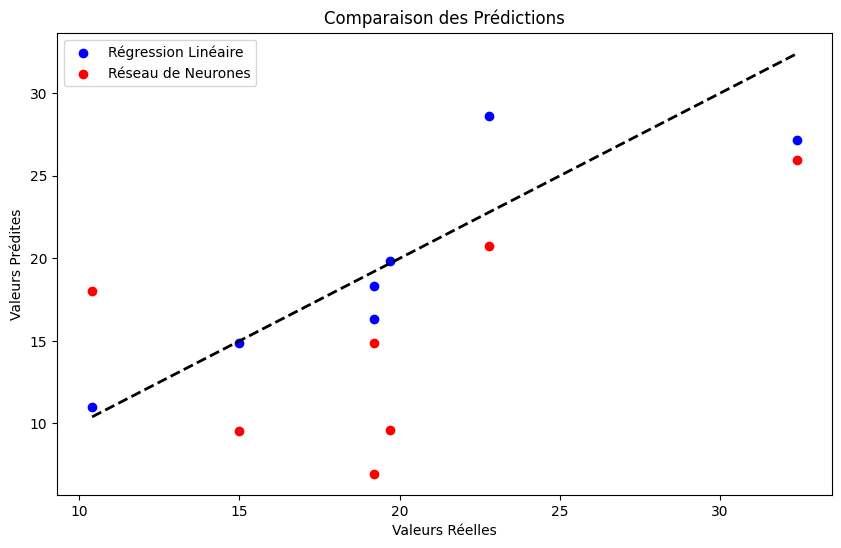

In [9]:
# Comparaison des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Régression Linéaire')
plt.scatter(y_test, y_pred_nn, color='red', label='Réseau de Neurones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Comparaison des Prédictions')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.legend()
plt.show()

Ce graphique compare les valeurs réelles de consommation (y_test) aux valeurs prédites par la régression linéaire et le réseau de neurones. Les points bleus (régression linéaire) et rouges (réseau de neurones) montrent la qualité des prédictions : plus les points sont proches de la diagonale (ligne pointillée), plus la prédiction est précise. Cela permet de comparer visuellement la performance des deux modèles

### Conclusion Générale

Ce projet a permis d’analyser en profondeur les facteurs influençant la consommation de carburant des véhicules à partir du jeu de données "mtcars". L’exploration des données a mis en évidence des relations significatives, notamment l’impact du poids et du nombre de cylindres sur la consommation. La modélisation, réalisée à l’aide d’une régression linéaire et d’un réseau de neurones, a montré que les deux approches permettent de prédire efficacement la consommation, avec une légère amélioration grâce au réseau de neurones qui capture mieux les relations non linéaires. Les visualisations ont facilité la compréhension des résultats et la comparaison des performances des modèles. Ce travail met en avant l’importance de l’analyse exploratoire et du choix des modèles pour des prédictions fiables, et ouvre la voie à des analyses plus avancées ou à l’intégration de données supplémentaires pour affiner encore les prédictions.